# Pima indian 당뇨병 예측

- 구성

Pregnancies : 임신횟수	

Glucose : 포도당 부하검사 수치

BloodPressure : 혈압(mm Hg)	

SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)	

Insulin : 혈청 인슐린(mu U/ml)	

BMI : (체중 / 키) ^ 2	

DiabetesPedigreeFunction : 당뇨 내력 가중치 값	

Age	: 나이

Outcome : 클래스 결정 값( 당뇨병 여부 )

In [1]:
import pandas as pd

diabetes_data = pd.read_csv('../datasets/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score, roc_auc_score
import numpy as np

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # f1 score 추가
    f1score = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    print('정확도(Accuracy): {0:.4f}, 정밀도(precision): {1:.4f}, 재현율(recall): {2:.4f}, F1(F1_score):{3:.4f}, ROC-AUC: {4:.4f}'.format(
        accuracy, precision, recall, f1score, roc_auc))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = diabetes_data.drop('Outcome', axis = 1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도(Accuracy): 0.7727, 정밀도(precision): 0.7209, 재현율(recall): 0.5741, F1(F1_score):0.6392, ROC-AUC: 0.7919


C:\Python\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 재현율이 낮게 나옴. 재현율을 조금 올리기 위해 임계값을 보고 균형 맞춰야 할거 같음

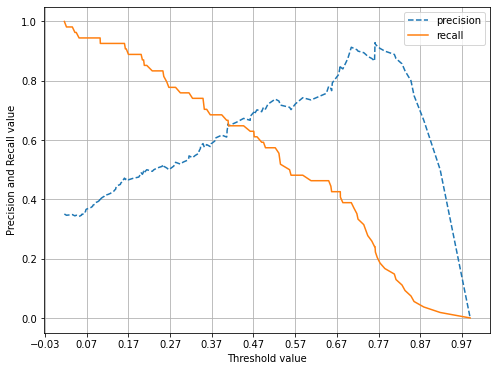

In [8]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot( y_test, pred_proba_c1)

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

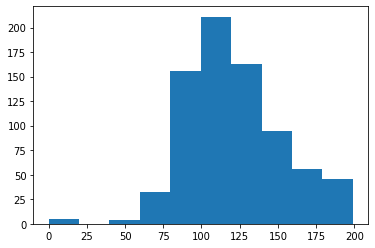

In [11]:
plt.hist(diabetes_data['Glucose'], bins = 10)

In [22]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print("{} 0 건수는 {}, 퍼센트는 {:.2f}%".format(feature, zero_count,(100 * zero_count / total_count)))
    print()

Glucose 0 건수는 5, 퍼센트는 0.65%

BloodPressure 0 건수는 35, 퍼센트는 4.56%

SkinThickness 0 건수는 227, 퍼센트는 29.56%

Insulin 0 건수는 374, 퍼센트는 48.70%

BMI 0 건수는 11, 퍼센트는 1.43%



In [23]:
# 0 값 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

### 0 값 평균값으로 대체한 데이터 세트에 피처 스케일링 적용

In [26]:
from sklearn.preprocessing import StandardScaler

X = diabetes_data.drop(['Outcome'], axis = 1)
y = diabetes_data['Outcome']

# 표준 정규분포화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도(Accuracy): 0.7987, 정밀도(precision): 0.7674, 재현율(recall): 0.6111, F1(F1_score):0.6804, ROC-AUC: 0.8433


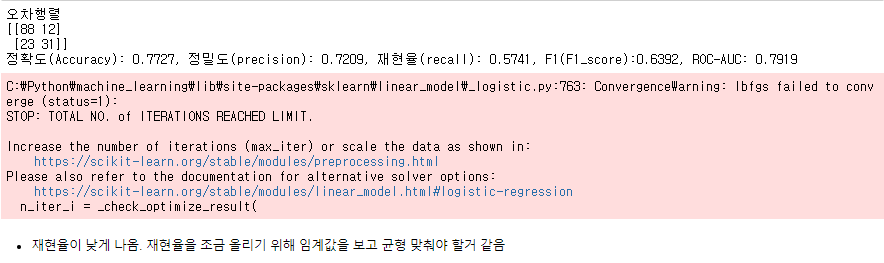


- 위의 결과에 비해 성능수치가 일정수준 개선되었다.

In [34]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [35]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.36, 0.39, 0.42, 0.45, 0.48, 0.50, 0.53, 0.56]

pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도(Accuracy): 0.7468, 정밀도(precision): 0.6190, 재현율(recall): 0.7222, F1(F1_score):0.6667, ROC-AUC: 0.8433
임곗값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도(Accuracy): 0.7532, 정밀도(precision): 0.6333, 재현율(recall): 0.7037, F1(F1_score):0.6667, ROC-AUC: 0.8433
임곗값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도(Accuracy): 0.7792, 정밀도(precision): 0.6923, 재현율(recall): 0.6667, F1(F1_score):0.6792, ROC-AUC: 0.8433
임곗값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도(Accuracy): 0.7857, 정밀도(precision): 0.7059, 재현율(recall): 0.6667, F1(F1_score):0.6857, ROC-AUC: 0.8433
임곗값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도(Accuracy): 0.7987, 정밀도(precision): 0.7447, 재현율(recall): 0.6481, F1(F1_score):0.6931, ROC-AUC: 0.8433
임곗값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도(Accuracy): 0.7987, 정밀도(precision): 0.7674, 재현율(recall): 0.6111, F1(F1_score):0.6804, ROC-AUC: 0.8433
임곗값: 0.53
오차행렬
[[91  9]
 [21 33]]
정확도(Accuracy): 0.8052, 정밀도(precision): 0.7857, 재현율(recall): 0.6111, F1(F1_score):0.6875, ROC-AUC: 0.8433
임곗값: 0.56
오차행렬
[[91  9]
 [23

- 가장 좋은 임곗값은 0.45로 보인다. 

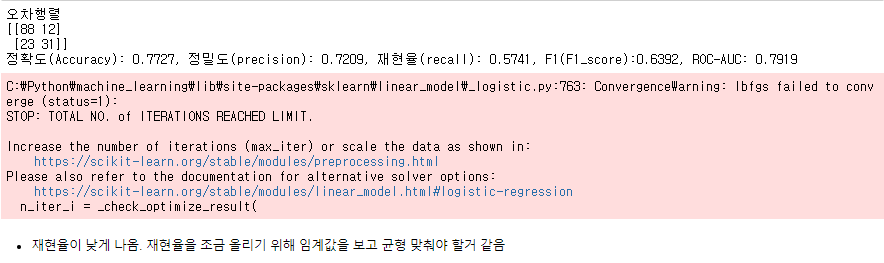

- 정확도(Accuracy): 0.7857, 정밀도(precision): 0.7059, 재현율(recall): 0.6667, F1(F1_score):0.6857, ROC-AUC: 0.8433로 정밀도를 최소로 감소시키고 재현율을 많이 상승 시켯기 때문이다.

### 이제 임계값 0.45로 다시예측

In [36]:
binarizer = Binarizer(threshold = 0.45)

# 위에서 구한 lr_clf의 예측확률 array에서 1에 해당하는 컬럼값을 Binarizer로 변환
pred_threshold_045 = binarizer.fit_transform(pred_proba[:,1].reshape(-1, 1))

get_clf_eval(y_test, pred_threshold_045, pred_proba[:,1])

오차행렬
[[85 15]
 [18 36]]
정확도(Accuracy): 0.7857, 정밀도(precision): 0.7059, 재현율(recall): 0.6667, F1(F1_score):0.6857, ROC-AUC: 0.8433
